In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv('https://raw.githubusercontent.com/shrikumarp/shrikumarpp1/master/yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

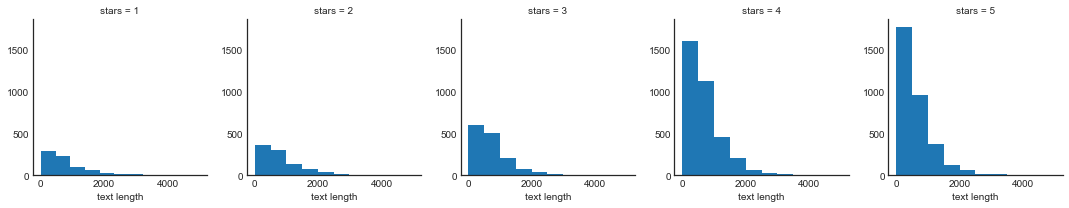

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

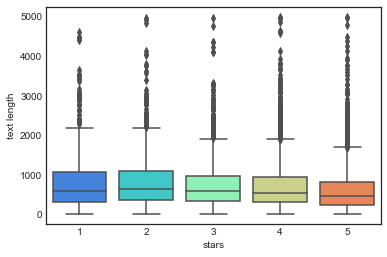

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

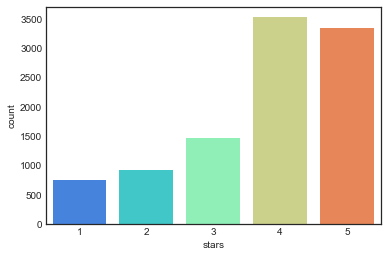

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


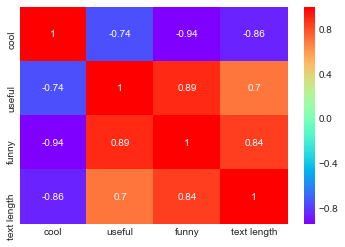

In [13]:
sns.heatmap(stars.corr(),cmap='rainbow',annot=True)

In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
X = cv.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [21]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
predictions = nb.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



Support Vector Classifier

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf']}]

In [26]:
from sklearn.svm import SVC

In [27]:
svmmodel = SVC()

In [28]:
svmmodel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
predsvm= svmmodel.predict(X_test)

In [30]:
print(confusion_matrix(y_test,predsvm))
print('\n')
print(classification_report(y_test,predsvm))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now we use the parameters list defined above to try to tune the parameter 'C' to see if we can squeeze out more accuracy out of this classifier.

In [35]:
grid_search_svm = GridSearchCV(estimator = svmmodel,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [36]:
grid_search_svm = grid_search_svm.fit(X_train, y_train)

In [37]:
grid_search_svm.best_score_

0.91573426573426575

In [38]:
grid_search_svm.best_params_

{'C': 1, 'kernel': 'linear'}

.

.

Using Random Forest Classifier Algorithm

In [40]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [41]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
rfpred= rforest.predict(X_test)

In [43]:
print(confusion_matrix(y_test,rfpred))
print('\n')
print(classification_report(y_test,rfpred))

[[ 81 147]
 [ 19 979]]


             precision    recall  f1-score   support

          1       0.81      0.36      0.49       228
          5       0.87      0.98      0.92       998

avg / total       0.86      0.86      0.84      1226



.

Using Logistic Regression

In [44]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV

We set the parameter grid again with a random space of values for parameter C, and we try to get the  maximum accuracy by tuning the hyperparameters.

In [45]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [46]:
logreg = LogisticRegression()

In [47]:
logreg_cv = GridSearchCV(logreg, param_grid, cv= 10)

In [48]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.9276223776223776


In [50]:
pred = logreg_cv.predict(X_test)

In [51]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.86      0.79      0.83       228
          5       0.95      0.97      0.96       998

avg / total       0.94      0.94      0.94      1226



As we can see, Logistic regression with hyperparameter tuning performs with the best accuracy with 94%.